<a href="https://colab.research.google.com/github/AjagTerbang/plat-nomor/blob/main/deteksi_plat_nomor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Mengecek apakah GPU tersedia
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU tersedia. Menggunakan GPU:")
    for gpu in gpu_available:
        print(f"  - {gpu}")
    # Secara default, TensorFlow akan menggunakan GPU jika tersedia.
    # Anda bisa secara eksplisit menentukan device jika diperlukan,
    # tetapi biasanya tidak perlu jika hanya ada satu GPU.
else:
    print("GPU tidak tersedia. Menggunakan CPU.")

GPU tersedia. Menggunakan GPU:
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
import os

In [ ]:
base_path = "/content/drive/MyDrive/1. Skripsi/Dataset/plat nomor"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "valid")
test_path = os.path.join(base_path, "test")
image_height = 480  # Sesuaikan dengan ukuran gambar Anda
image_width = 640  # Sesuaikan dengan ukuran gambar Anda
batch_size = 32

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


In [ ]:

def load_data_from_csv(csv_path, folder_path, img_size=(128, 128)):
    df = pd.read_csv(csv_path)
    X, y = [], []
    for _, row in df.iterrows():
        img_path = os.path.join(folder_path, row['filename'])
        image = load_img(img_path, target_size=img_size)
        image = img_to_array(image) / 255.0
        X.append(image)
        y.append(row['class'])
    return np.array(X), np.array(y)

train_csv = os.path.join(train_path, '_annotations.csv')
val_csv = os.path.join(val_path, '_annotations.csv')
test_csv = os.path.join(test_path, '_annotations.csv')

X_train, y_train = load_data_from_csv(train_csv, train_path)
X_val, y_val = load_data_from_csv(val_csv, val_path)
X_test, y_test = load_data_from_csv(test_csv, test_path)

In [ ]:


# Fungsi untuk menampilkan gambar dengan bounding box dari _annotations.csv
def show_image_with_bbox(img_dir, csv_path, num_images=5):
    # Baca file anotasi
    df = pd.read_csv(csv_path)

    # Ambil hanya beberapa gambar unik
    unique_files = df['filename'].unique()[:num_images]

    for filename in unique_files:
        image_path = os.path.join(img_dir, filename)
        if not os.path.exists(image_path):
            print(f"File gambar tidak ditemukan: {image_path}")
            continue

        # Buka gambar
        img = Image.open(image_path)
        fig, ax = plt.subplots(1)
        ax.imshow(img)

        # Ambil semua bounding box untuk gambar ini
        bboxes = df[df['filename'] == filename]

        for _, row in bboxes.iterrows():
            xmin = row['xmin']
            ymin = row['ymin']
            xmax = row['xmax']
            ymax = row['ymax']
            width = xmax - xmin
            height = ymax - ymin

            # Tambahkan kotak ke gambar
            rect = patches.Rectangle(
                (xmin, ymin), width, height,
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax.add_patch(rect)

        plt.title(filename)
        plt.axis('off')
        plt.show()

# Panggil fungsi untuk menampilkan gambar dengan anotasi
show_image_with_bbox(
    img_dir="/content/drive/MyDrive/1. Skripsi/Dataset/plat nomor/train/",
    csv_path="/content/drive/MyDrive/1. Skripsi/Dataset/plat nomor/train/_annotations.csv",
    num_images=5
)



In [ ]:

# %%
# Memuat data training
print("Memuat data training...")
train_images, train_bounding_boxes, train_labels = load_data_from_directory(
    train_dir, annotation_filename, image_height, image_width
)

if train_images is not None:
    print(f"\nJumlah gambar training dimuat: {len(train_images)}")
    print(f"Shape gambar training: {train_images.shape}")
    print(f"Shape bounding boxes training: {train_bounding_boxes.shape}")
    print(f"Shape labels training: {train_labels.shape}")

# %%
# Memuat data validasi
print("\nMemuat data validasi...")
valid_images, valid_bounding_boxes, valid_labels = load_data_from_directory(
    valid_dir, annotation_filename, image_height, image_width
)

if valid_images is not None:
    print(f"\nJumlah gambar validasi dimuat: {len(valid_images)}")
    print(f"Shape gambar validasi: {valid_images.shape}")
    print(f"Shape bounding boxes validasi: {valid_bounding_boxes.shape}")
    print(f"Shape labels validasi: {valid_labels.shape}")

# %%
# Memuat data test
print("\nMemuat data test...")
test_images, test_bounding_boxes, test_labels = load_data_from_directory(
    test_dir, annotation_filename, image_height, image_width
)

if test_images is not None:
    print(f"\nJumlah gambar test dimuat: {len(test_images)}")
    print(f"Shape gambar test: {test_images.shape}")
    print(f"Shape bounding boxes test: {test_bounding_boxes.shape}")
    print(f"Shape labels test: {test_labels.shape}")
else:
    print("\nData validasi tidak berhasil dimuat. Pelatihan model tidak dapat dilanjutkan dengan validasi.")


Memuat data training...
File annotation berhasil dimuat dari /content/drive/MyDrive/1. Skripsi/Dataset/plat nomor/train/_annotations.csv.

Jumlah gambar training dimuat: 708
Shape gambar training: (708, 480, 640, 3)
Shape bounding boxes training: (708, 4)
Shape labels training: (708,)

Memuat data validasi...
File annotation berhasil dimuat dari /content/drive/MyDrive/1. Skripsi/Dataset/plat nomor/valid/_annotations.csv.

Jumlah gambar validasi dimuat: 67
Shape gambar validasi: (67, 480, 640, 3)
Shape bounding boxes validasi: (67, 4)
Shape labels validasi: (67,)

Memuat data test...
File annotation berhasil dimuat dari /content/drive/MyDrive/1. Skripsi/Dataset/plat nomor/test/_annotations.csv.

Jumlah gambar test dimuat: 31
Shape gambar test: (31, 480, 640, 3)
Shape bounding boxes test: (31, 4)
Shape labels test: (31,)


In [ ]:
# Contoh Pembangunan Model CNN (Sama seperti sebelumnya)
if train_images is not None: # Pastikan data training berhasil dimuat
    input_tensor = Input(shape=(image_height, image_width, 3))

    # Base CNN
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)

    # Output untuk Bounding Box Regression (4 koordinat)
    bbox_output = Dense(4, activation='sigmoid', name='bbox_output')(x)

    # Output untuk Klasifikasi (1 kelas: 'plat nomor')
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)

    # Gabungkan input dan output
    model = Model(inputs=input_tensor, outputs=[bbox_output, class_output])

    model.summary()
    # Kompilasi Model
    model.compile(optimizer='adam',
              loss={'bbox_output': 'mse', 'class_output': 'binary_crossentropy'},
              metrics={'bbox_output': 'mse', 'class_output': 'accuracy'})


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 480, 640,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 480, 640,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 240, 320,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 240, 320,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 120, 160,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 120, 160,  │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 60, 80,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 614400)    │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox_output (Dense) │ (None, 4)         │  2,457,604 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_output        │ (None, 1)         │    614,401 │ flatten[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,165,253 (12.07 MB)

 Trainable params: 3,165,253 (12.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # Import callbacks


In [ ]:

early_stopping = EarlyStopping(monitor='val_class_accuracy', patience=3, verbose=1, mode='max')

best_model_path='/content/drive/MyDrive/1. Skripsi/Dataset/plat nomor/best_license_plate_detector.keras'

model_checkpoint = ModelCheckpoint(filepath=best_model_path,
                                    monitor='val_class_accuracy',
                                    save_best_only=True,
                                    mode='max',
                                    verbose=1)

# Menyatukan semua callback ke dalam list
callbacks_list = [early_stopping, model_checkpoint]

In [ ]:
# Pelatihan Model
# Pastikan data validasi juga berhasil dimuat sebelum melatih
if valid_images is not None:
      print("\nMemulai pelatihan model...")
      history = model.fit(train_images, {'bbox_output': train_bounding_boxes, 'class_output': train_labels},
                epochs=50, # Sesuaikan jumlah epoch
                batch_size=batch_size,
                validation_data=(valid_images, {'bbox_output': valid_bounding_boxes, 'class_output': valid_labels}),
                callbacks=callbacks_list
                )

else:
    print("\nData validasi tidak berhasil dimuat. Pelatihan model tidak dapat dilanjutkan dengan validasi.")



Memulai pelatihan model...
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - bbox_output_loss: 0.4249 - bbox_output_mse: 0.4251 - class_output_accuracy: 1.0000 - class_output_loss: 0.0000e+00 - loss: 0.4251 - val_bbox_output_loss: 0.4233 - val_bbox_output_mse: 0.4043 - val_class_output_accuracy: 1.0000 - val_class_output_loss: 0.0000e+00 - val_loss: 0.4043
Epoch 2/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - bbox_output_loss: 0.4248 - bbox_output_mse: 0.4248 - class_output_accuracy: 1.0000 - class_output_loss: 0.0000e+00 - loss: 0.4248

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_class_accuracy` which is not available. Available metrics are: bbox_output_loss,bbox_output_mse,class_output_accuracy,class_output_loss,loss,val_bbox_output_loss,val_bbox_output_mse,val_class_output_accuracy,val_class_output_loss,val_loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_class_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - bbox_output_loss: 0.4277 - bbox_output_mse: 0.4278 - class_output_accuracy: 1.0000 - class_output_loss: 0.0000e+00 - loss: 0.4278 - val_bbox_output_loss: 0.4233 - val_bbox_output_mse: 0.4043 - val_class_output_accuracy: 1.0000 - val_class_output_loss: 0.0000e+00 - val_loss: 0.4043
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - bbox_output_loss: 0.4288 - bbox_output_mse: 0.4288 - class_output_accuracy: 1.0000 - class_output_loss: 0.0000e+00 - loss: 0.4288 - val_bbox_output_loss: 0.4233 - val_bbox_output_mse: 0.4043 - val_class_output_accuracy: 1.0000 - val_class_output_loss: 0.0000e+00 - val_loss: 0.4043
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - bbox_output_loss: 0.4265 - bbox_output_mse: 0.4266 - class_output_accuracy: 1.0000 - class_output_loss: 0.0000e+00 - loss: 0.4266 - val_bbox_output_loss: 0.4233 - val_bbox_output_mse: 0.4043 - val_class_output_accuracy: 1.0000 - val_class_output_loss: 0.0000e+00 - val_loss: 0.4043
Epoch 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Menampilkan grafik pelatihan dan validasi...


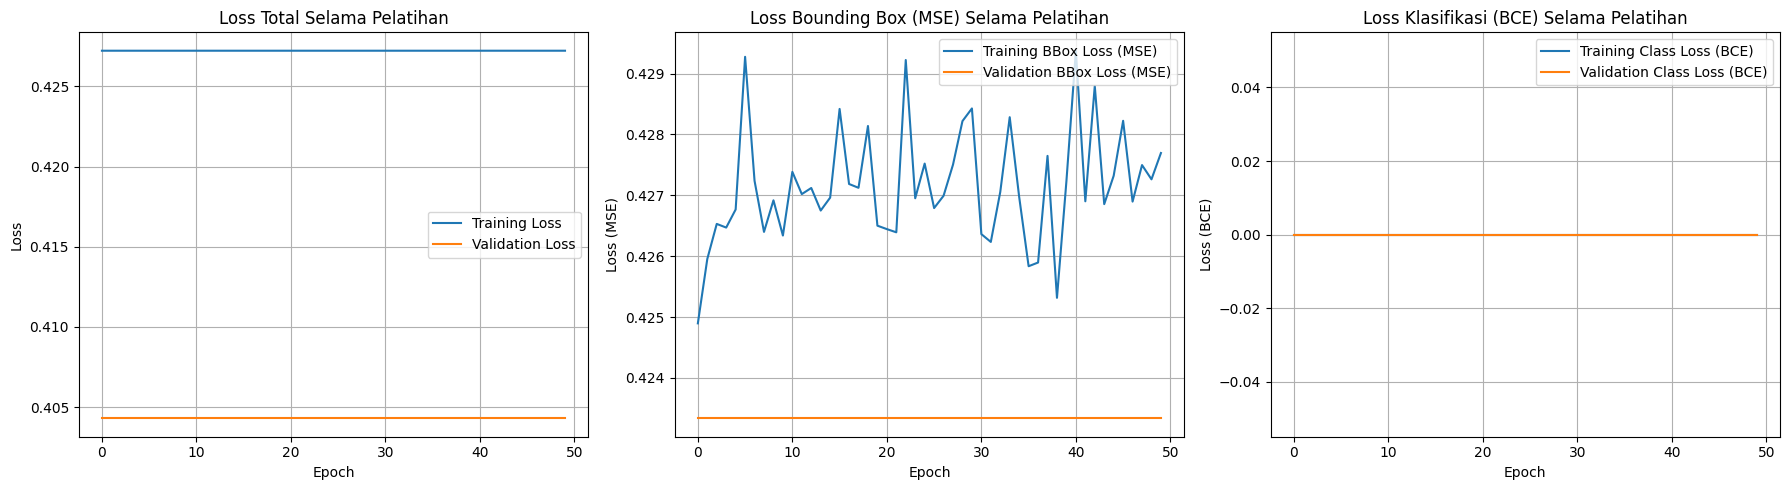

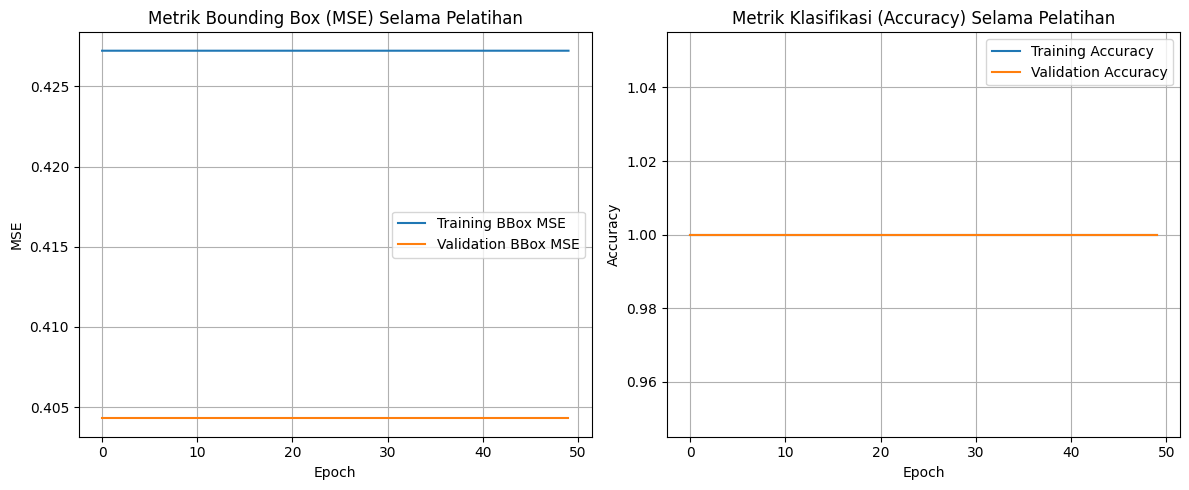

In [ ]:

print("Menampilkan grafik pelatihan dan validasi...")

# Grafik Loss Total dan per Output
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
if valid_images is not None:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Total Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(history.history['bbox_output_loss'], label='Training BBox Loss (MSE)')
if valid_images is not None:
    plt.plot(history.history['val_bbox_output_loss'], label='Validation BBox Loss (MSE)')
plt.title('Loss Bounding Box (MSE) Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(history.history['class_output_loss'], label='Training Class Loss (BCE)')
if valid_images is not None:
    plt.plot(history.history['val_class_output_loss'], label='Validation Class Loss (BCE)')
plt.title('Loss Klasifikasi (BCE) Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Grafik Metrik
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['bbox_output_mse'], label='Training BBox MSE')
if valid_images is not None:
    plt.plot(history.history['val_bbox_output_mse'], label='Validation BBox MSE')
plt.title('Metrik Bounding Box (MSE) Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['class_output_accuracy'], label='Training Accuracy')
if valid_images is not None:
     plt.plot(history.history['val_class_output_accuracy'], label='Validation Accuracy')
plt.title('Metrik Klasifikasi (Accuracy) Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
best_model_path='/content/drive/MyDrive/1. Skripsi/Dataset/plat nomor/best_license_plate_detector.keras'
# best_model = None # Hapus baris ini karena ini menginisialisasi best_model menjadi None terlalu dini

# Pastikan data test sudah dimuat di sel sebelumnya
# Variabel yang dibutuhkan: test_images, test_bounding_boxes, test_labels

# Periksa apakah file model terbaik ada sebelum mencoba memuatnya
if 'test_images' in globals() and test_images is not None and os.path.exists(best_model_path):
   print(f"Memuat model terbaik dari {best_model_path} untuk evaluasi test...")
   try:
       # Penting: Saat memuat model custom, jika Anda memiliki custom_objects
       # seperti custom loss function atau metrik, Anda perlu menentukannya di sini.
       # Contoh: best_model = tf.keras.models.load_model(best_model_path, custom_objects={'custom_loss': custom_loss})
       best_model = tf.keras.models.load_model(best_model_path) # best_model sekarang akan berisi model yang dimuat

       print("\nMengevaluasi model terbaik menggunakan data test...")
       # Hasil evaluate akan berbeda tergantung output model dan metrik yang digunakan
       # Urutannya sesuai dengan metrics yang dikompilasi pada model.compile()
       # loss, bbox_loss, class_loss, bbox_mse, class_accuracy
       evaluation_results = best_model.evaluate(
           test_images, {'bbox_output': test_bounding_boxes, 'class_output': test_labels},
           verbose=0 # Atur ke 1 jika Anda ingin melihat progress
       )

       print(f"\nHasil Evaluasi Model Terbaik pada Data Test:")
       # Pastikan indeks ini sesuai dengan urutan output dan metrik Anda saat kompilasi
       print(f"  Loss Total: {evaluation_results[0]}")
       print(f"  Loss Bounding Box (MSE): {evaluation_results[1]}") # Indeks 1 karena bbox_output loss pertama
       print(f"  Loss Klasifikasi (Binary Crossentropy): {evaluation_results[2]}") # Indeks 2 karena class_output loss kedua
       print(f"  Metrik Bounding Box (MSE): {evaluation_results[3]}") # Indeks 3 karena bbox_output_mse metrik pertama
       print(f"  Metrik Klasifikasi (Accuracy): {evaluation_results[4]}") # Indeks 4 karena class_output_accuracy metrik kedua


   except Exception as e:
       print(f"Error memuat atau mengevaluasi model terbaik: {e}")

else:
    print("\nData test tidak berhasil dimuat, model terbaik tidak ditemukan, atau variabel test_images tidak ada. Evaluasi test tidak dapat dilakukan.")


Data test tidak berhasil dimuat, model terbaik tidak ditemukan, atau variabel test_images tidak ada. Evaluasi test tidak dapat dilakukan.
